In [2]:
from pathlib import Path
import pandas as pd
import sys
import random
from termcolor import colored
import numpy as np
from scipy.signal import convolve2d

sys.path.append(str(Path("..").resolve()))
from src import *

# Discard Messy Samples
Some baked textures are very messy. We think they would hinder the training, so we need to devise a method to detect them.

In [3]:
dataset = ShapeNetCoreDataset3D()

## Convolutional Filters
In the following, we're going to test a few methods:
- Computing the mean of the $\sigma$ of the three channels,
- Computing the `numpy` gradient of the image,
- Apply the _Sobel_ 0-sum filter,
- Apply the _Prewitt_ 0-sum filter,
- Apply the _Laplacian_ 0-sum filter

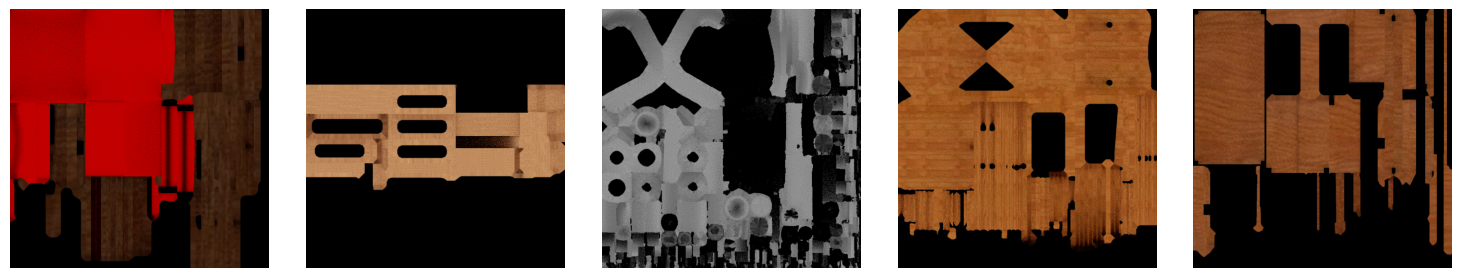

In [4]:
diffuses = sorted((dataset.DATASET_DIR / "diffuse").glob("*.png"))[:5]
plot_images(diffuses)

[0] - Mean STD=20.6 Mean Gradient=3.0 Mean Sobel=17.6 Mean Prewitt=12.8 Mean Laplacian=10.3
[1] - Mean STD=62.6 Mean Gradient=3.1 Mean Sobel=20.7 Mean Prewitt=15.3 Mean Laplacian=8.0
[2] - Mean STD=61.0 Mean Gradient=8.4 Mean Sobel=54.9 Mean Prewitt=40.4 Mean Laplacian=22.5
[3] - Mean STD=45.3 Mean Gradient=5.9 Mean Sobel=36.8 Mean Prewitt=27.0 Mean Laplacian=17.8
[4] - Mean STD=43.7 Mean Gradient=4.5 Mean Sobel=29.2 Mean Prewitt=21.5 Mean Laplacian=13.1


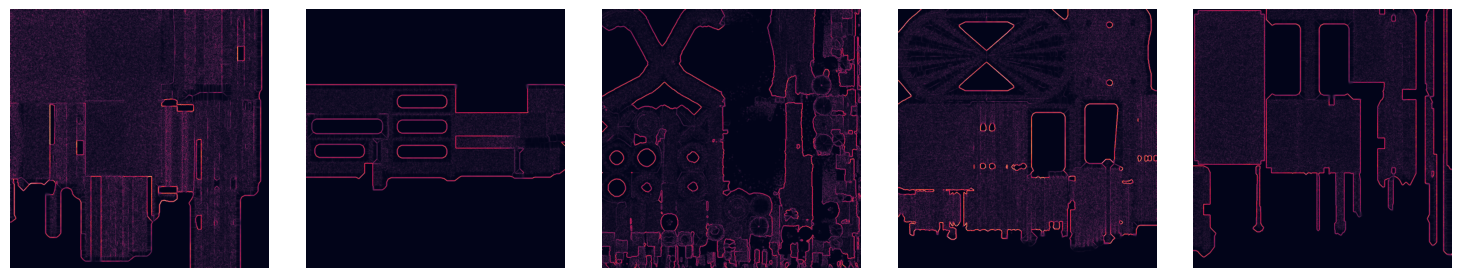

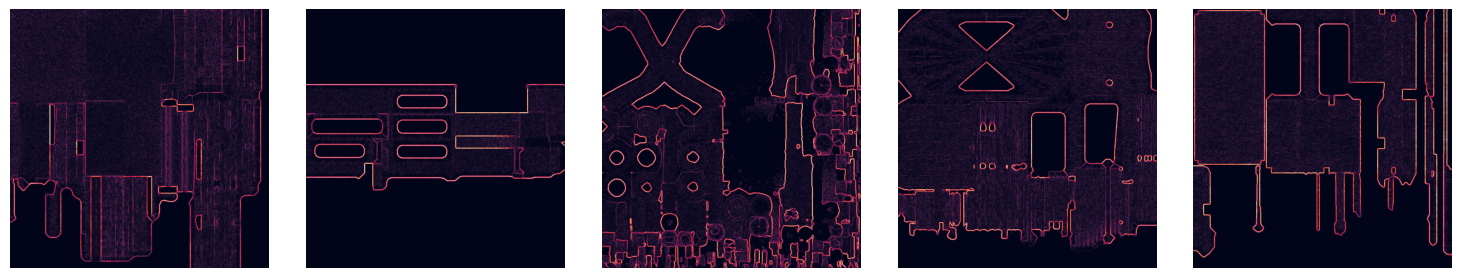

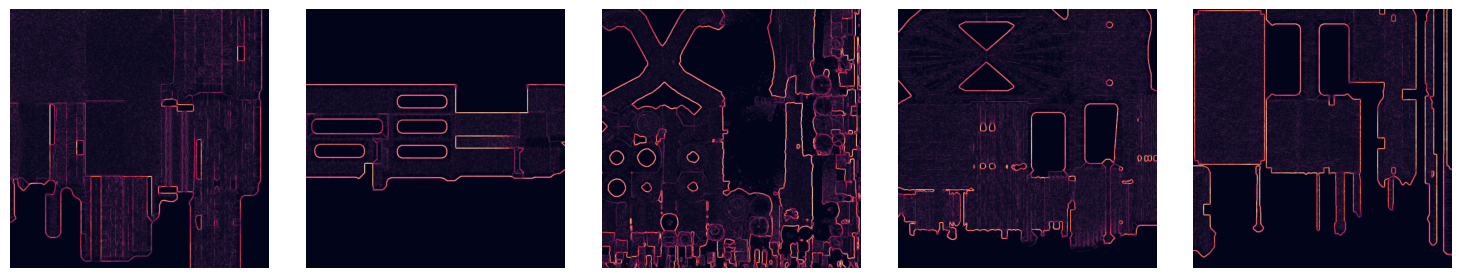

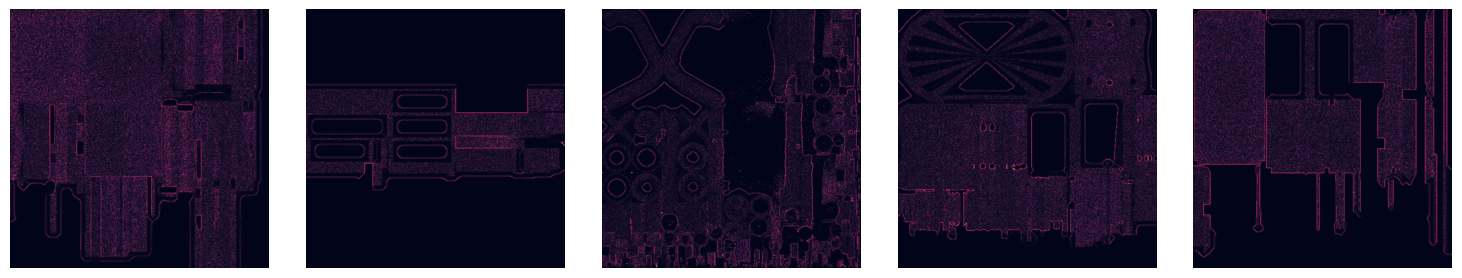

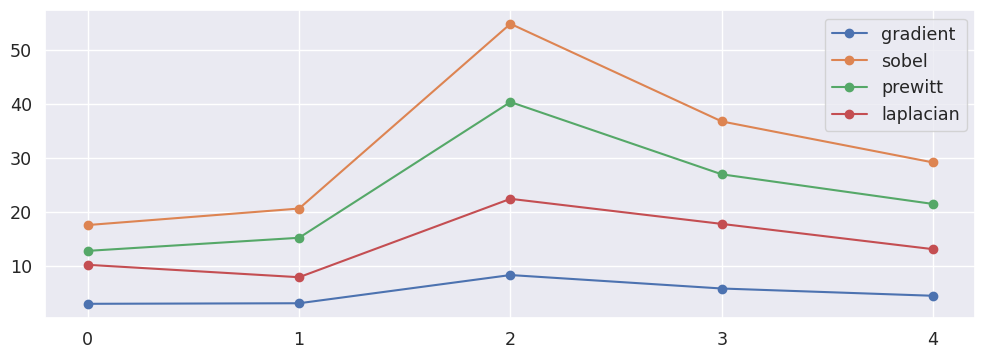

In [5]:
gradients, gradient_vals = [], []
laplacians = []
prewitts = []
sobels = []
for i in range(5):
    arr = np.array(diffuses[i].convert("L"), dtype=np.float32)

    gradients.append(np.hypot(*np.gradient(arr)))
    gradient_vals.append(np.mean(gradients[i]))

    sobels.append(SobelFilter()(arr))
    prewitts.append(PrewittFilter()(arr))
    laplacians.append(LaplacianFilter()(arr))

    cprint(
        f"[{i}] -",
        f"red:Mean STD={arr.std(axis=(0, 1)):.1f}",
        f"blue:Mean Gradient={gradient_vals[i]:.1f}",
        f"green:Mean Sobel={sobels[i][0]:.1f}",
        f"yellow:Mean Prewitt={prewitts[i][0]:.1f}",
        f"cyan:Mean Laplacian={laplacians[i][0]:.1f}",
    )

plot_images(gradients, size=3)
plot_images([x[1] for x in sobels], size=3)
plot_images([x[1] for x in prewitts], size=3)
plot_images([x[1] for x in laplacians], size=3)
ax = pd.DataFrame(
    dict(
        gradient=gradient_vals,
        sobel=[x[0] for x in sobels],
        prewitt=[x[0] for x in prewitts],
        laplacian=[x[0] for x in laplacians],
    )
).plot(figsize=(12, 4), marker="o")
ax.set_xticks(range(0, 5));

The Laplacian filter is the only one to match the exact scoring order of the 5 samples.